In [142]:
import pandas as pd
import matplotlib.pyplot as plt

domains = ["vertebrate", "fungi", "bacteria", "plant", "protist", "metazoa"]
file_paths = {domain: f"compression_ratios_{domain}.csv" for domain in domains}

dataframes = []
for domain, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df["domain"] = domain
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df["total_len_sum"] = combined_df["cds_tot_len"] + combined_df["ncrna_tot_len"]
combined_df["total_len_ratio"] = combined_df["cds_tot_len"] / combined_df["ncrna_tot_len"]

filtered_df_cds_ncrna = combined_df[(combined_df["cds_compression_ratio_geco3"] > 0) & 
                                    (combined_df["ncrna_compression_ratio_geco3"] > 0)]

filtered_df_cds = combined_df[(combined_df["cds_tot_len"] > 0) & 
                              (combined_df["cds_compression_ratio_geco3"] > 0)]

filtered_df_ncrna = combined_df[(combined_df["ncrna_tot_len"] > 0) & 
                                (combined_df["ncrna_compression_ratio_geco3"] > 0)]

colors = {"vertebrate": "blue", "fungi": "green", "bacteria": "orange", "plant": "purple", "protist": "magenta", "metazoa": "#00FA9A" }
markers = {"vertebrate": "o", "fungi": "s", "bacteria": "^", "plant": "D", "protist": "*", "metazoa": "v"}

## GECO3 vs GZIP

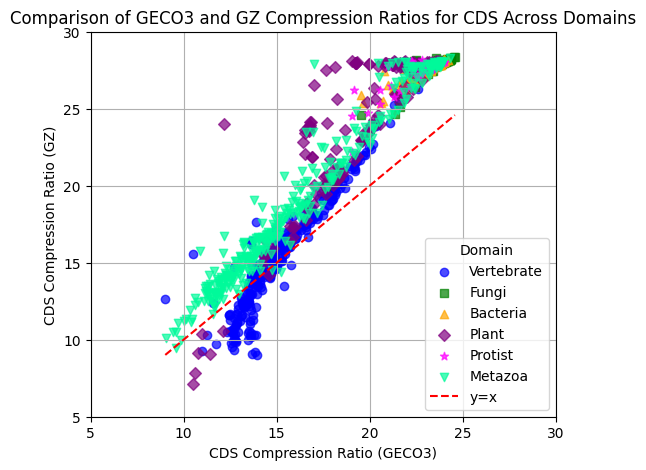

In [143]:
geco3_compression = filtered_df_cds["cds_compression_ratio_geco3"]
gz_compression = filtered_df_cds["cds_compression_ratio_gz"]

plt.figure(figsize=(6, 5))

for domain in filtered_df_cds["domain"].unique():
    domain_data = filtered_df_cds[filtered_df_cds["domain"] == domain]
    plt.scatter(domain_data["cds_compression_ratio_geco3"], 
                domain_data["cds_compression_ratio_gz"], 
                color=colors[domain], 
                marker=markers[domain], 
                alpha=0.7, 
                label=domain.capitalize())

plt.xlabel("CDS Compression Ratio (GECO3)")
plt.ylabel("CDS Compression Ratio (GZ)")
plt.title("Comparison of GECO3 and GZ Compression Ratios for CDS Across Domains")

plt.plot([min(geco3_compression), max(geco3_compression)], 
         [min(geco3_compression), max(geco3_compression)], 
         color='red', linestyle='--', label='y=x')

plt.xlim(5,30)
plt.ylim(5,30)
plt.legend(title="Domain", loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

## CDS vs ncRNA Compression Ratio (GECO3)
### Do CDS and ncRNA compress the same?

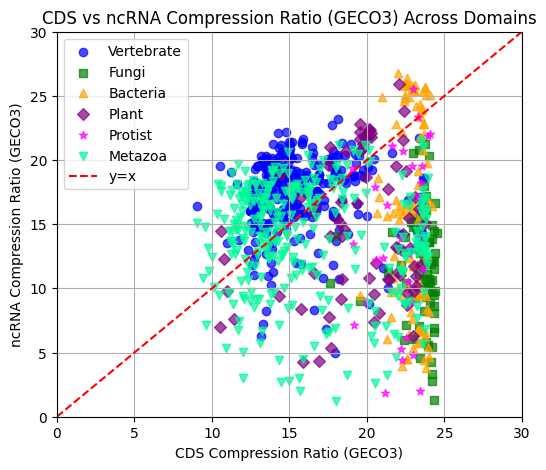

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

for domain in filtered_df_cds_ncrna["domain"].unique():
    domain_data = filtered_df_cds_ncrna[filtered_df_cds_ncrna["domain"] == domain]
    plt.scatter(domain_data["cds_compression_ratio_geco3"], 
                domain_data["ncrna_compression_ratio_geco3"], 
                color=colors[domain],  # Set edge color
                marker=markers[domain], 
                alpha=0.7, 
                label=domain.capitalize())

plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel("CDS Compression Ratio (GECO3)")
plt.ylabel("ncRNA Compression Ratio (GECO3)")
plt.title("CDS vs ncRNA Compression Ratio (GECO3) Across Domains")
plt.plot([0, 30], [0, 30], color='red', linestyle='--', label='y=x')
plt.legend()
plt.grid(True)
plt.show()

## CDS Total Length vs CDS Compression Ratio (GECO3)
### Does CDS compressibilty depend on the amount of CDS? 
### Do genomes with more coding material compress more or less this material?

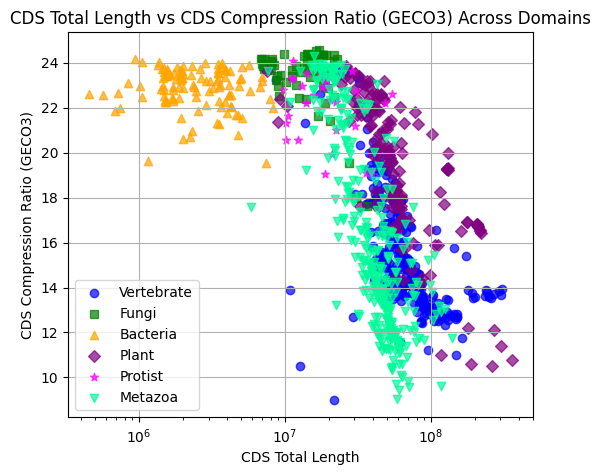

In [145]:
plt.figure(figsize=(6, 5))

for domain in filtered_df_cds["domain"].unique():
    domain_data = filtered_df_cds[filtered_df_cds["domain"] == domain]
    plt.scatter(domain_data["cds_tot_len"], 
                domain_data["cds_compression_ratio_geco3"], 
                color=colors[domain], 
                marker=markers[domain], 
                alpha=0.7, 
                label=domain.capitalize())

plt.xlabel("CDS Total Length")
plt.ylabel("CDS Compression Ratio (GECO3)")
plt.title("CDS Total Length vs CDS Compression Ratio (GECO3) Across Domains")
plt.xscale('log')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## ncRNA Total Length vs ncRNA Compression Ratio (GECO3)
### Does ncRNA compressibilty depend on the amount of ncRNA? 
### Do genomes with more non-coding material compress more or less this material?

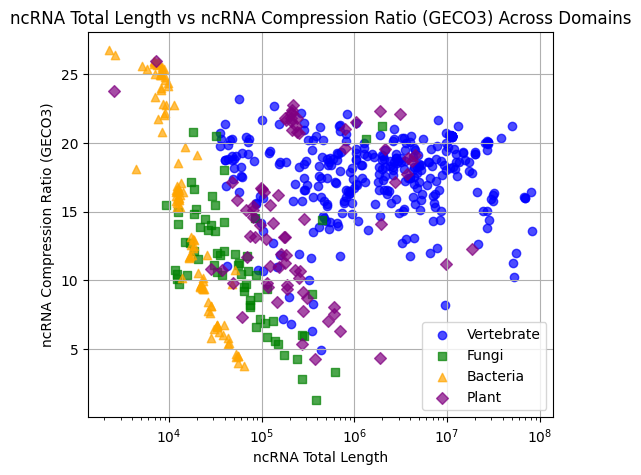

In [67]:
plt.figure(figsize=(6, 5))

for domain in filtered_df_ncrna["domain"].unique():
    domain_data = filtered_df_ncrna[filtered_df_ncrna["domain"] == domain]
    plt.scatter(domain_data["ncrna_tot_len"], 
                domain_data["ncrna_compression_ratio_geco3"], 
                color=colors[domain], 
                marker=markers[domain], 
                alpha=0.7, 
                label=domain.capitalize())

plt.xlabel("ncRNA Total Length")
plt.ylabel("ncRNA Compression Ratio (GECO3)")
plt.title("ncRNA Total Length vs ncRNA Compression Ratio (GECO3) Across Domains")
plt.xscale('log')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## How does compressibility depend on string length?

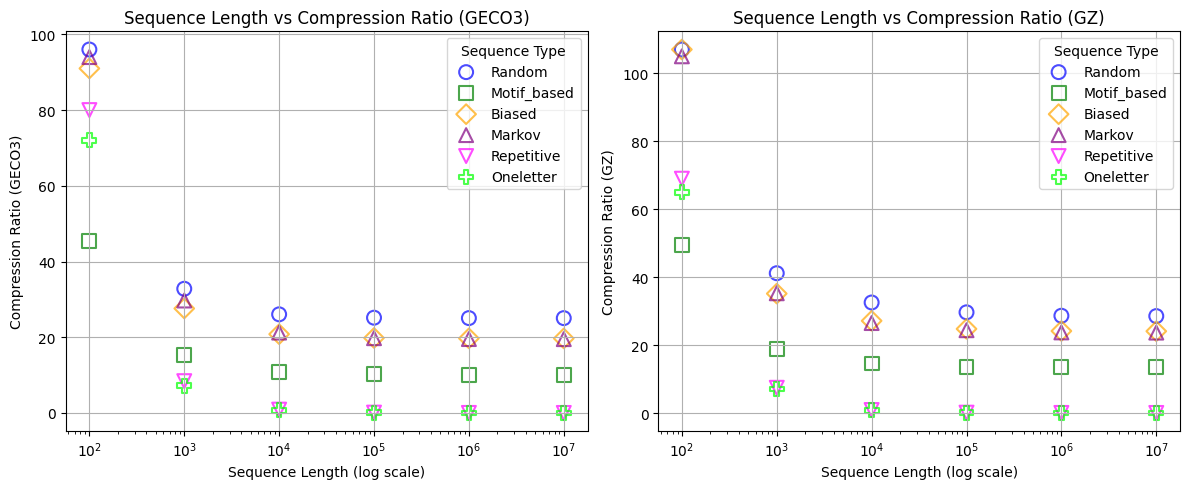

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "compression_ratios_random.csv"
df = pd.read_csv(file_path)

sequence_length = df["sequence_length"]
compression_ratio_geco3 = df["compression_ratio_geco3"]
compression_ratio_gz = df["compression_ratio_gz"]
sequence_type = df["sequence_type"]

colors = {
    "random": "blue",
    "motif_based": "green",
    "biased": "orange",
    "markov": "purple",
    "repetitive": "magenta",
    "oneletter": "lime"
}

# Dictionary for different markers
markers = {
    "random": "o",  # Circle
    "motif_based": "s",  # Square
    "biased": "D",  # Diamond
    "markov": "^",  # Triangle Up
    "repetitive": "v",  # Triangle Down
    "oneletter": "P"  # Plus
}

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: GECO3 Compression Ratio
for stype in df["sequence_type"].unique():
    subset = df[df["sequence_type"] == stype]
    ax[0].scatter(subset["sequence_length"], subset["compression_ratio_geco3"], 
                  facecolors='none', edgecolors=colors.get(stype, "black"), 
                  marker=markers.get(stype, "o"), alpha=0.7, label=stype.capitalize(), s=100, linewidths=1.5)
ax[0].set_xscale('log')
ax[0].set_xlabel("Sequence Length (log scale)")
ax[0].set_ylabel("Compression Ratio (GECO3)")
ax[0].set_title("Sequence Length vs Compression Ratio (GECO3)")

# Plot 2: GZ Compression Ratio
for stype in df["sequence_type"].unique():
    subset = df[df["sequence_type"] == stype]
    ax[1].scatter(subset["sequence_length"], subset["compression_ratio_gz"], 
                  facecolors='none', edgecolors=colors.get(stype, "black"), 
                  marker=markers.get(stype, "o"), alpha=0.7, label=stype.capitalize(), s=100, linewidths=1.5)
ax[1].set_xscale('log')
ax[1].set_xlabel("Sequence Length (log scale)")
ax[1].set_ylabel("Compression Ratio (GZ)")
ax[1].set_title("Sequence Length vs Compression Ratio (GZ)")

ax[0].legend(title="Sequence Type")
ax[1].legend(title="Sequence Type")
ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
plt.show()
